In [4]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
df_fix = pd.read_csv('C:\\Users\\thebl\\Downloads\\Clone\\Intern-BCC-2024\\Dataset\\Processed\\df_fix.csv')

In [6]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   6308 non-null   int64  
 1   date         6308 non-null   object 
 2   Tavg         6308 non-null   float64
 3   RH_avg       6308 non-null   float64
 4   ss           6308 non-null   float64
 5   ddd_x        6308 non-null   float64
 6   ff_avg       6308 non-null   float64
 7   RR           6308 non-null   float64
 8   ddd_car      6308 non-null   object 
 9   region_name  6308 non-null   object 
 10  flood        6308 non-null   int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 542.2+ KB


In [7]:
df_fix = df_fix.drop(columns=['Unnamed: 0','date'], axis=1)

In [8]:
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6308 entries, 0 to 6307
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tavg         6308 non-null   float64
 1   RH_avg       6308 non-null   float64
 2   ss           6308 non-null   float64
 3   ddd_x        6308 non-null   float64
 4   ff_avg       6308 non-null   float64
 5   RR           6308 non-null   float64
 6   ddd_car      6308 non-null   object 
 7   region_name  6308 non-null   object 
 8   flood        6308 non-null   int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 443.7+ KB


In [9]:
df_target = df_fix['flood']

In [10]:
df_train_dumied = pd.get_dummies(df_fix, columns=['ddd_car', 'region_name'])

In [11]:
df_train_dumied.dtypes

Tavg                           float64
RH_avg                         float64
ss                             float64
ddd_x                          float64
ff_avg                         float64
RR                             float64
flood                            int64
ddd_car_C                         bool
ddd_car_E                         bool
ddd_car_N                         bool
ddd_car_NE                        bool
ddd_car_NW                        bool
ddd_car_S                         bool
ddd_car_SE                        bool
ddd_car_SW                        bool
ddd_car_W                         bool
region_name_Jakarta Pusat         bool
region_name_Jakarta Selatan       bool
region_name_Jakarta Timur         bool
region_name_Jakarta Utara         bool
dtype: object

In [12]:
df_train_dumied.drop(columns=['flood'], inplace=True)

In [13]:
from imblearn.over_sampling import RandomOverSampler    
X = df_train_dumied
y = df_target

# Inisialisasi RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Melakukan oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Menampilkan jumlah sampel setelah oversampling
print("Jumlah sampel setelah oversampling:")
print(y_resampled.value_counts())

Jumlah sampel setelah oversampling:
flood
0    5832
1    5832
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))


Jumlah data latih: 9331
Jumlah data uji: 2333


Accuracy: 0.9828546935276468
f1 score: 0.9825783972125436


<Axes: >

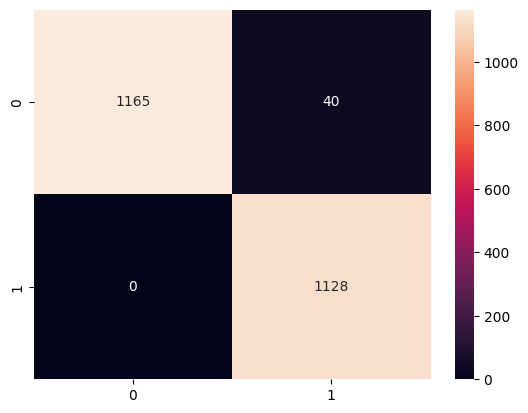

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("f1 score:", f1)
cm_2 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_2,annot=True,fmt="g")


Accuracy: 0.9507072438919846
f1 score: 0.9514563106796117


<Axes: >

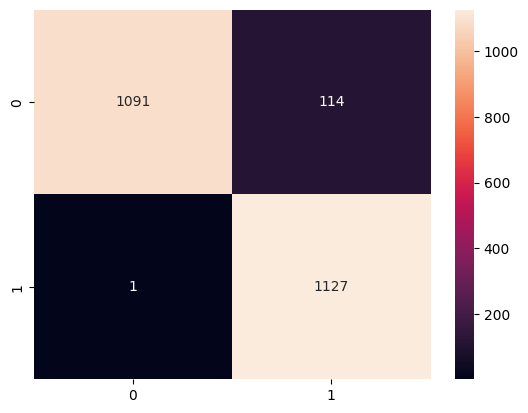

In [16]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train) 


y_pred = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("f1 score:", f1)
cm_2 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_2,annot=True,fmt="g")



Accuracy: 0.7603943420488641
f1 score: 0.7589478223372144


<Axes: >

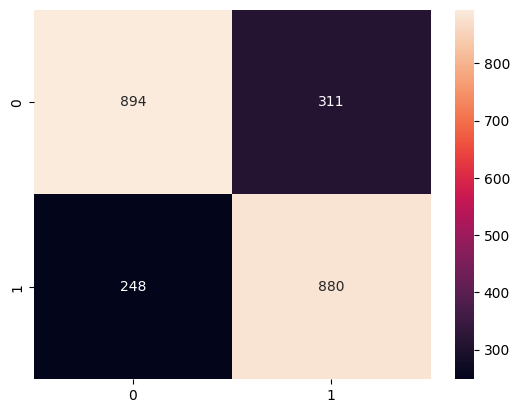

In [17]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', random_state=42)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("f1 score:", f1)
cm_2 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_2,annot=True,fmt="g")


In [18]:
df_fix

,Tavg,RH_avg,ss,ddd_x,ff_avg,RR,ddd_car,region_name,flood
0,28.6,81.0,5.8,280.0,2.0,9.239964,S,Jakarta Selatan,0
1,27.0,88.0,8.7,290.0,2.0,1.600000,W,Jakarta Selatan,1
2,28.1,80.0,5.4,280.0,2.0,33.800000,SW,Jakarta Selatan,1
3,29.2,81.0,6.6,200.0,1.0,23.800000,S,Jakarta Selatan,0
4,26.7,91.0,3.2,180.0,1.0,13.800000,S,Jakarta Selatan,0
...,...,...,...,...,...,...,...,...,...
6303,28.0,70.0,0.2,180.0,5.0,2.300000,W,Jakarta Timur,0
6304,28.5,69.0,0.2,250.0,3.0,4.200000,SE,Jakarta Timur,0
6305,28.7,70.0,0.2,120.0,5.0,6.100000,SW,Jakarta Timur,0
6306,30.0,64.0,0.2,240.0,5.0,8.000000,W,Jakarta Timur,0


In [19]:
df_no_ddd_car = df_fix.copy()
df_no_ddd_car.drop(columns=['ddd_car'], inplace=True)

Accuracy: 0.9794256322331761
f1 score: 0.9791666666666666


<Axes: >

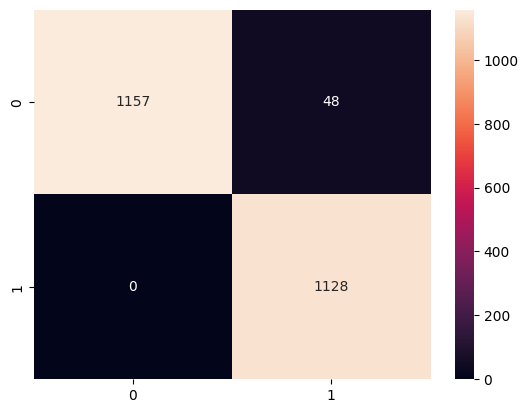

In [20]:
# mencoba train tanpa menggunakan fitur ddd_car atau arah angin saat kecepatan maksimal
df_dummied = pd.get_dummies(df_no_ddd_car, columns=['region_name'], drop_first=True)

X = df_dummied.drop(columns=['flood'])
y = df_dummied['flood']

oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("f1 score:", f1)
cm_2 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_2,annot=True,fmt="g")

In [27]:
X_resampled

,Tavg,RH_avg,ss,ddd_x,ff_avg,RR,region_name_Jakarta Selatan,region_name_Jakarta Timur,region_name_Jakarta Utara
0,28.6,81.0,5.8,280.0,2.0,9.239964,True,False,False
1,27.0,88.0,8.7,290.0,2.0,1.600000,True,False,False
2,28.1,80.0,5.4,280.0,2.0,33.800000,True,False,False
3,29.2,81.0,6.6,200.0,1.0,23.800000,True,False,False
4,26.7,91.0,3.2,180.0,1.0,13.800000,True,False,False
...,...,...,...,...,...,...,...,...,...
11659,27.5,76.0,3.7,190.0,3.0,20.442857,True,False,False
11660,25.6,93.0,1.2,250.0,2.0,1.700000,True,False,False
11661,25.4,84.0,4.0,270.0,2.0,75.500000,False,False,True
11662,25.9,88.0,0.2,270.0,3.0,19.400000,False,True,False


### Mencoba mencari parameter terbaik dari model randomforest

Accuracy: 0.9631375910844406
f1 score: 0.9632792485055508


<Axes: >

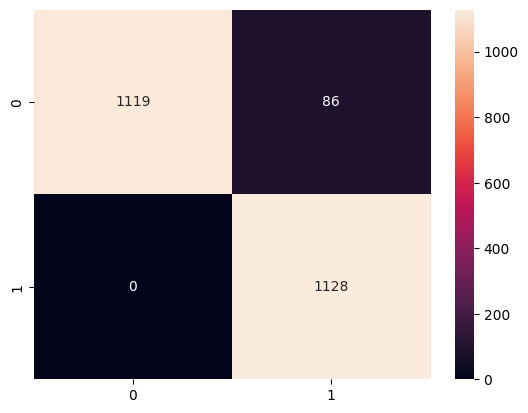

In [21]:
# n_estimators=50, max_depth=15, random_state=42

rf = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42)
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("f1 score:", f1)
cm_2 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_2,annot=True,fmt="g")

Accuracy: 0.9627089584226318
f1 score: 0.9628681177976952


<Axes: >

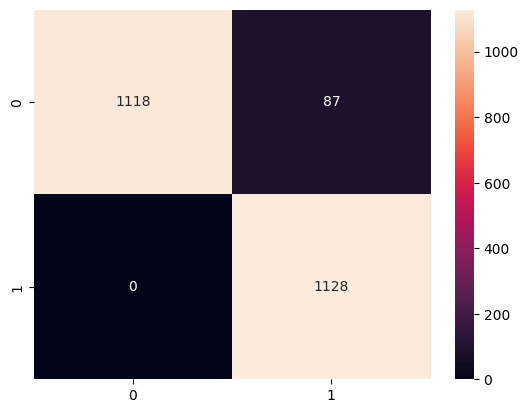

In [22]:
# n_estimators=100, max_depth=15, random_state=42

rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("f1 score:", f1)
cm_2 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_2,annot=True,fmt="g")

Accuracy: 0.9794256322331761
f1 score: 0.9791666666666666


<Axes: >

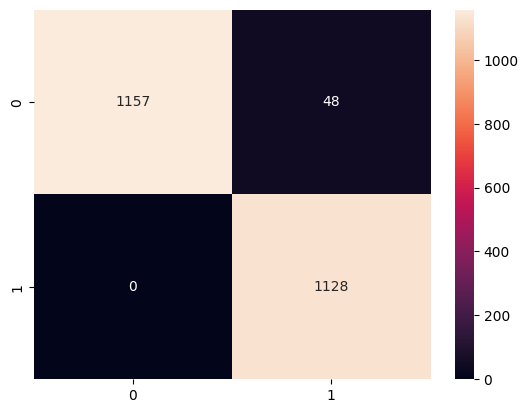

In [23]:
# n_estimators=100, max_depth=None, random_state=42

rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("f1 score:", f1)
cm_2 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_2,annot=True,fmt="g")

Accuracy: 0.9802828975567939
f1 score: 0.9800173761946134


<Axes: >

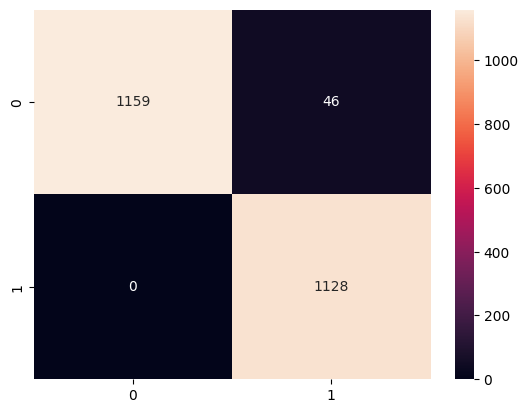

In [24]:
# n_estimators=100, max_depth=none, random_state=42

rf = RandomForestClassifier(n_estimators=150, max_depth=None, random_state=42)
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred)
print("f1 score:", f1)
cm_2 = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_2,annot=True,fmt="g")

In [25]:
import pickle
with open('best_classify.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [26]:
# Buka file pickle
with open('C:\\Users\\fayme amelia celesta\\Documents\\VScode\\Github\\Intern-BCC-2024\\Code\\models\\Classification Model\\best_classify.pkl', 'rb') as f:
    rf_model = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\fayme amelia celesta\\Documents\\VScode\\Github\\Intern-BCC-2024\\Code\\models\\Classification Model\\best_classify.pkl'

In [ ]:
import sklearn
sklearn.__version__

'1.4.1.post1'